# DEMO: Amazon Bedrock's _Knowledge Base_ creation

[ES] En esta demo, se mostrará el procedimiento para implementar de forma sencilla una aplicación RAG utilizando como base los documentos almacenados en un bucket S3 de AWS. El RAG se creará mediante el servicio _Knowledge Bases_ de Bedrock.

Este documento está divido en dos secciones:
- En la primera sección, se mostrará paso a paso cómo crear la _Knowledge Base_ a través de la consola de AWS. 
- En la segunda sección, se detallará la conexión de esta libreta con la _Knowledge Base_, permitiendo hacer preguntas a un modelo _LLM_ sobre la información que contienen los documentos almacenados en un bucket S3 de AWS.

[EN] This demo shows the procedure to easily implement a RAG using AWS S3 bucket files as a data source. The RAG will be created using Bedrock's _Knowledge Bases_ service.

This document is divided in two sections:
- In the first section, the _Knowledge Base_ will be created step by step through AWS console.
- In the second section, the library connection with the _Knowledge Base_ will be detailed, allowing to ask questions to a _LLM_ model about the info that contains the documents stored in S3 bucket.



## Section 1: _Knowledge Base_ creation
[ES] A continuación, se detallan los pasos para crear la _Knowledge Base_ a partir:
- A. [Datos almacenados en S3](#sectiona)
- B. [Datos disponible en una página web](#sectionb)

[EN] Here are the details to create the _Knowledge Base_ from:
- A. [S3 stored data](#sectiona)
- B. [Web page available data](#sectionb)

<!-- ### A. Data source: S3 -->

<h2 id="sectiona">A. Data source: S3</h2>

#### **A.1. "Amazon Bedrock" access**  
[ES] Desde la página principal de la consola de AWS, puede utilizar el buscador para encontrar el servicio "Amazon Bedrock". Una vez localizado, acceda al servicio.

[EN] "Amazon Bedrock" service can be found in the main page of AWS console. Once found, access it.

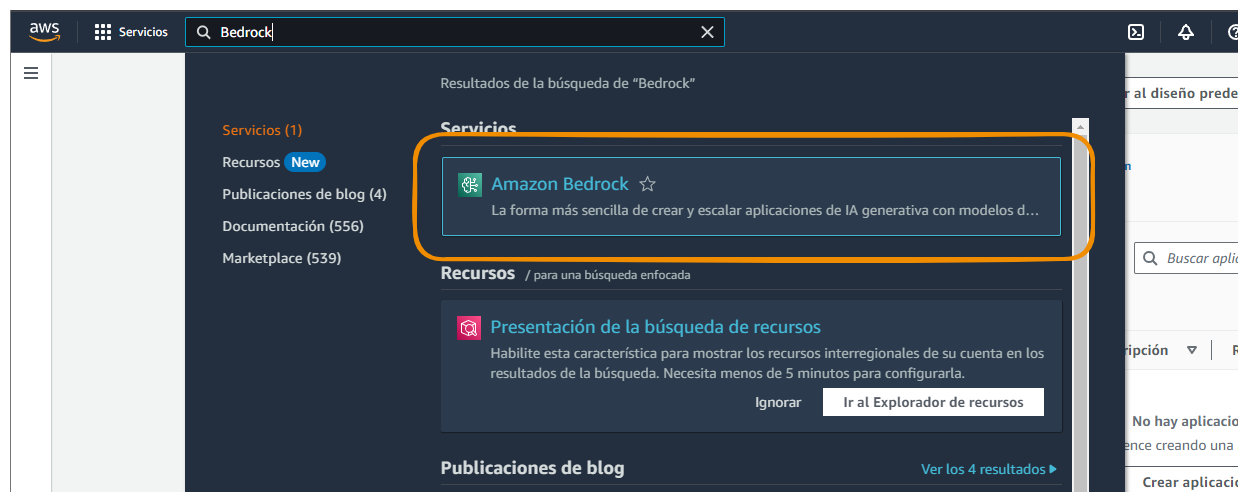

#### **A.2. "Knowledge Bases" access**  
[ES] En esta página, puede desplegar el menú de la izquierda usando el botón con tres líneas o hacer clic sobre el botón de "Introducción".  

[EN] Expand the left side menu using the three line button o clicking the "Introduction" button.

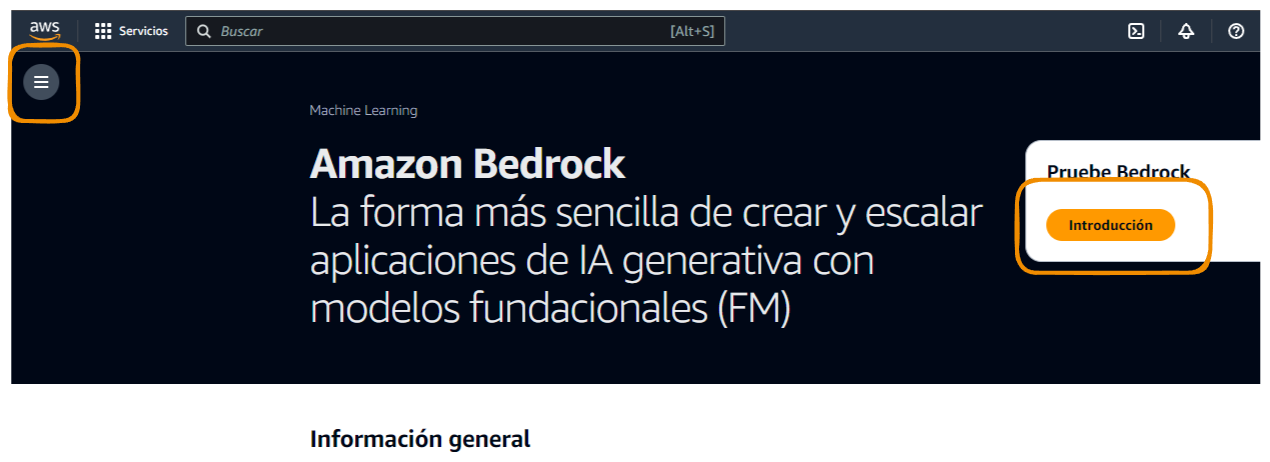  

[ES] El objetivo es encontrar el apartado llamado "Bases de Conocimiento" en el menú de la parte izquierda de la pantalla y acceder a él.   

[EN] The aim is to find the "Knowledge Bases" section in the left side menu and access it.

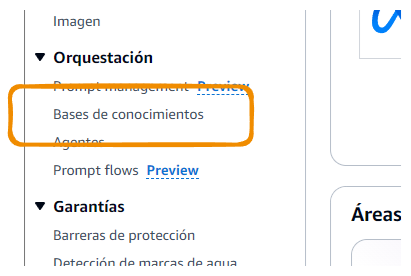

#### **A.3. Start the _Knowledge Base_ creation**  

[ES] Para comenzar a crear la _Knowledge Base_, haga clic sobre el botón "Crear una base de conocimientos".

[EN] To start with the _Knowledge Base_ creation, click "Create a knowledge base" button.

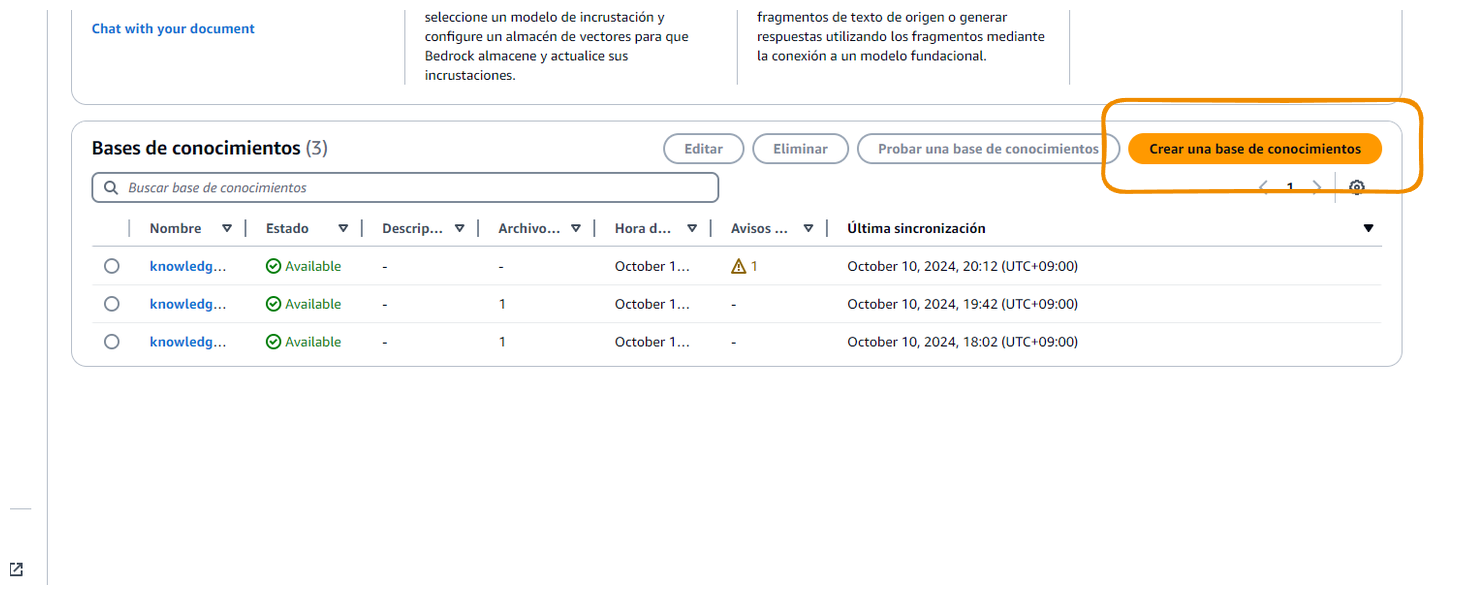  

#### **A.4. Knowledge Base creation (1st screen)**  

[ES] En esta pantalla podrá asignarle un nombre a la _Knowledge Base_ y, si lo desea, agregar una descripción.  
El resto de las opciones deben mantenerse por defecto, pero debe asegurarse que la fuente de datos seleccionada sea "Amazon S3":  

[EN] In this screen you can assign a name and a description (if needed) to the _Knowledge Base_.
The rest of the options must stay by default, but the data source must be "Amazon S3".

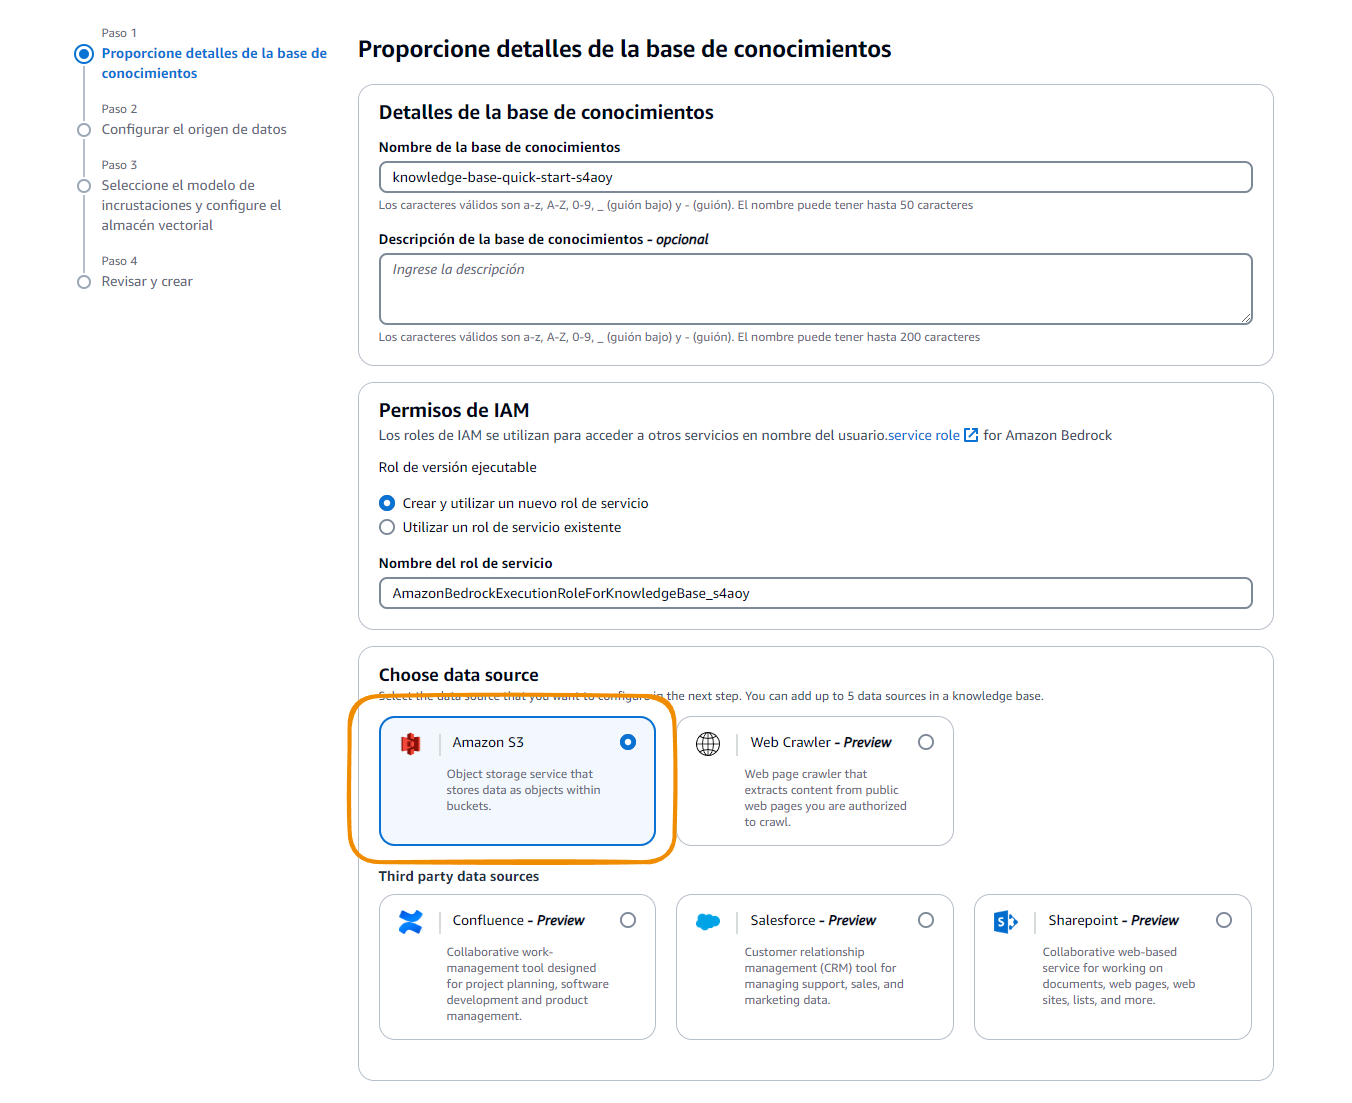

[ES] Continúe con el siguiente paso presionando el botón "Siguiente".  

[EN] Continue to the next step by clicking "Next".

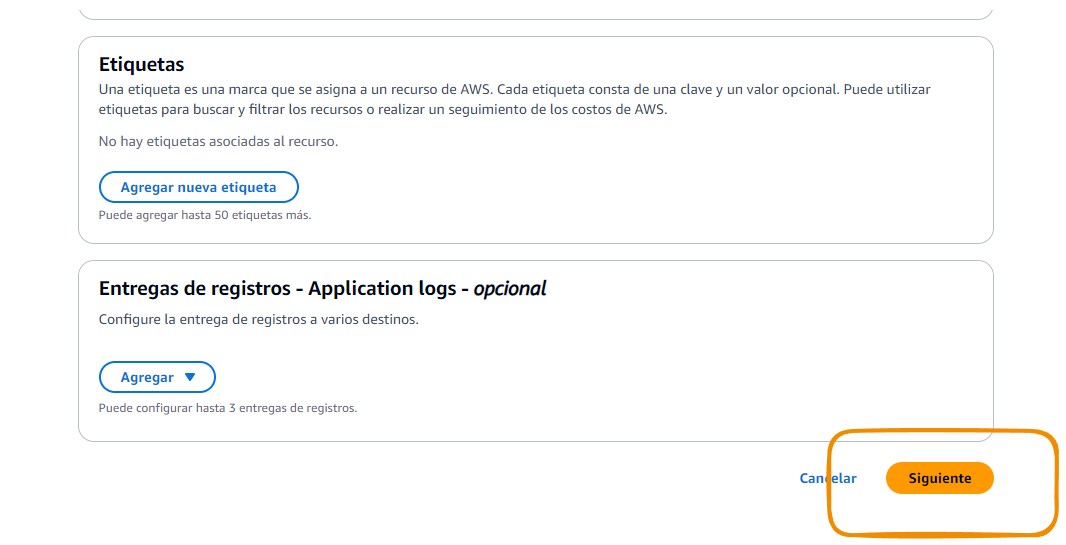

#### **A.5. _Knowledge Base_ creation (2nd screen)**  

[ES] En esta pantalla, puede asignar un nombre a la fuente de datos.  

Es importante asegurarse de seleccionar como fuente de datos un **bucket de S3 de otra cuenta de AWS**. Deberá rellenar dos campos (esta información está detallada en el documento del reto): 
 - ID de la cuenta. 
 - URL del bucket de S3 donde se encuentran los documentos.  

Para esta demo, utilice los siguientes valores:
- ID: `992382592876`
- URL: `s3://data-clinic-hackathon-2024/BASE_DEMO/RAG/`


En cuanto a la estrategia de _chunking_, se deja el valor por defecto*.  
> *Si eres un usuario avanzado o tienes experiencia previa en sistemas de RAG, puede optar por modificar la estrategia de _chunking_ para intentar mejorar los resultados del _retrieval_. Sin embargo, este tutorial no cubre este caso.  

Finalmente, pulse el botón "Siguiente" para continuar.

[EN] In this screen, you can assign a name to the data source.

It is important to select  **S3 bucket from other AWS account** as the data source. Fill the two following fields (this info is detailed in the challenge document):
 - Account ID. 
 - S3 Bucket URL where de files are located.  

For this demo, use the following values:
- ID: `992382592876`
- URL: `s3://data-clinic-hackathon-2024/BASE_DEMO/RAG/`

For _chunking_ strategy, keep the default value*.
> *If you are an advanced user or have previous experience with RAG, you can modify the _chunking_ strategy to try and improve the _retrieval_ results. Anyway, this is not shown in this tutorial.

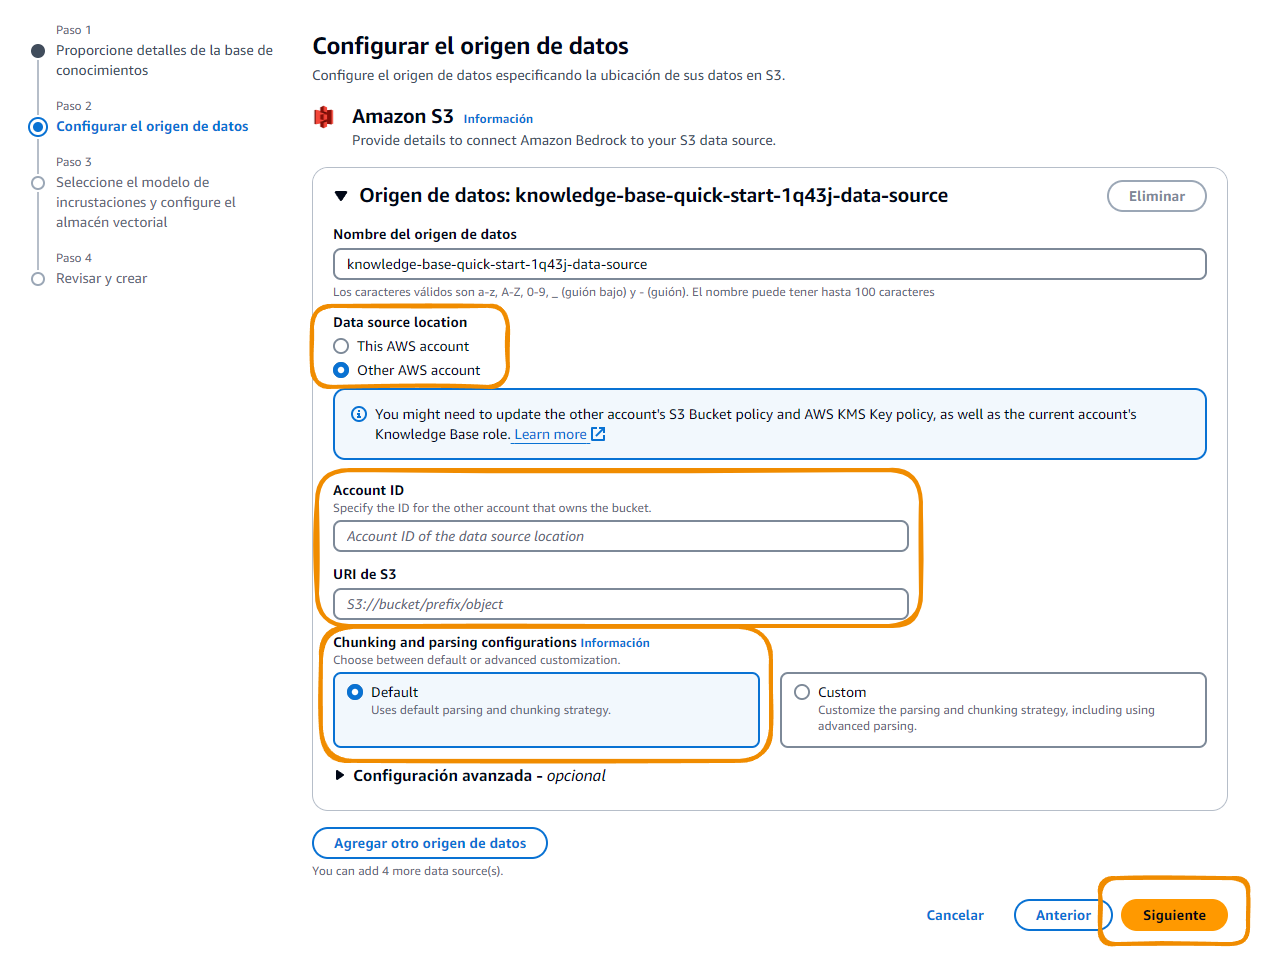

#### **A.6. _Knowledge Base_ creation (3rd screen)**  

[ES] En esta pantalla, se elige el modelo de _embeddings_, que es el modelo de inteligencia artificial encargado de transformar el contenido de los documentos en vectores. Estos vectores se compararán con las preguntas de entrada y se utilizarán como contexto para el modelo _LLM_, que será el encargado de responder las preguntas.  

Se recomienda seleccionar el modelo "Embed Multilingual V3" de Cohere, ya que es probable que los documentos con los que trabaje no estén en inglés o se encuentren en varios idiomas. 

Finalmente, pulse el botón "Siguiente" para continuar. 

[EN] The _embeddings_ model is selected in this screen, which stands for the AI model that will transform the documents content to vectors. These vectors will be compared to the input questions and used as context for the _LLM_ model, that will answer the questions.

Cohere's "Embed Multilingual V3" model is advised to use, due to the probability of the used documents to not be in english or to be found in many languages.

At last, click "Next" to continue.

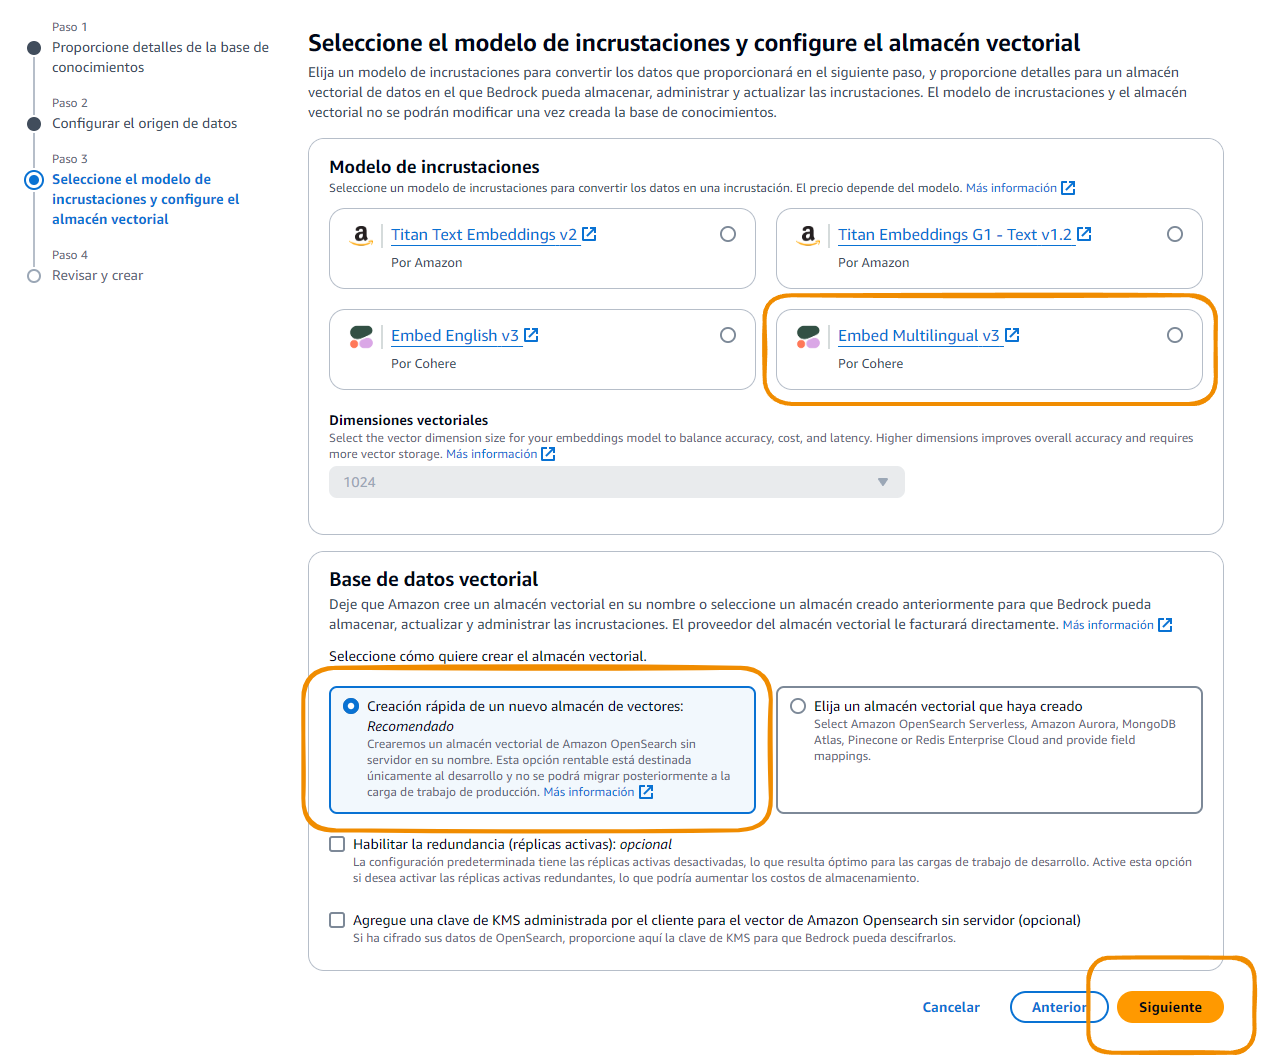

#### **A.7. _Knowledge Base_ creation (Final screen)**  
[ES] En esta pantalla, puede revisar que todas las opciones que ha seleccionado hasta ahora sean correctas.

Si todo está en orden, diríjase a la parte inferior de la pantalla y haga clic en el botón "Crear base de conocimientos".

[EN] This screen is used to review all the selected options and make sure they are correct.

If everything is correct, go to the bottom part of the screen and click "Create a Knowledge Base".

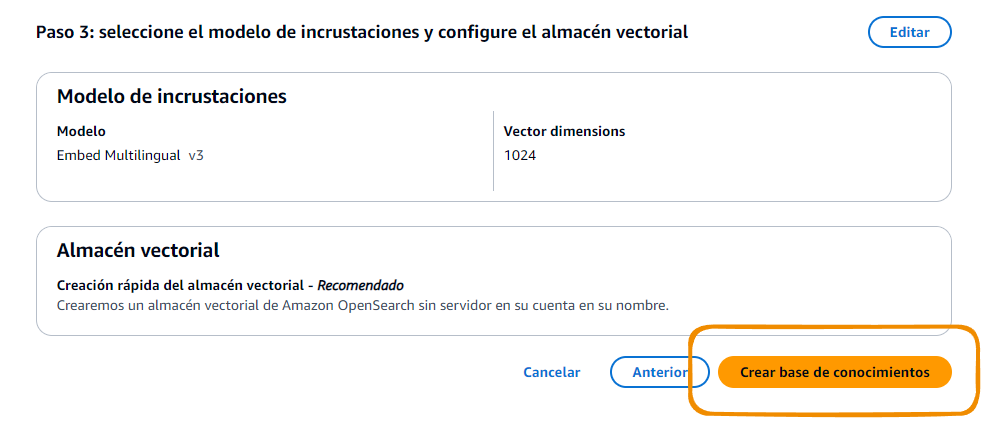

[ES] Mientras se crea la base de conocimientos, debería ver un mensaje como este en la parte superior:

[EN] Meanwhile the base is being created, you should see a message like this in the top part:

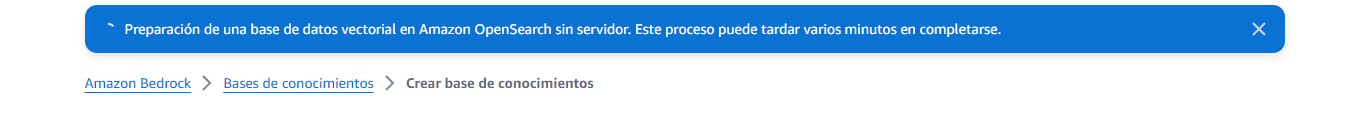

[ES] A medida que avanza la creación, debería ver algo como esto:

[EN] As the creation advances, you should see a message like this:

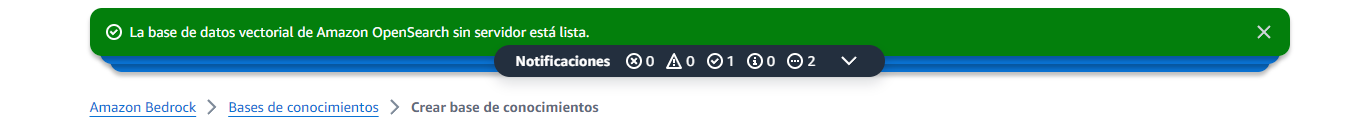

[ES] Finalmente, debería ser redirigido automáticamente a una pantalla como la siguiente:

[EN] At last, you should be redirected to a screen like this:

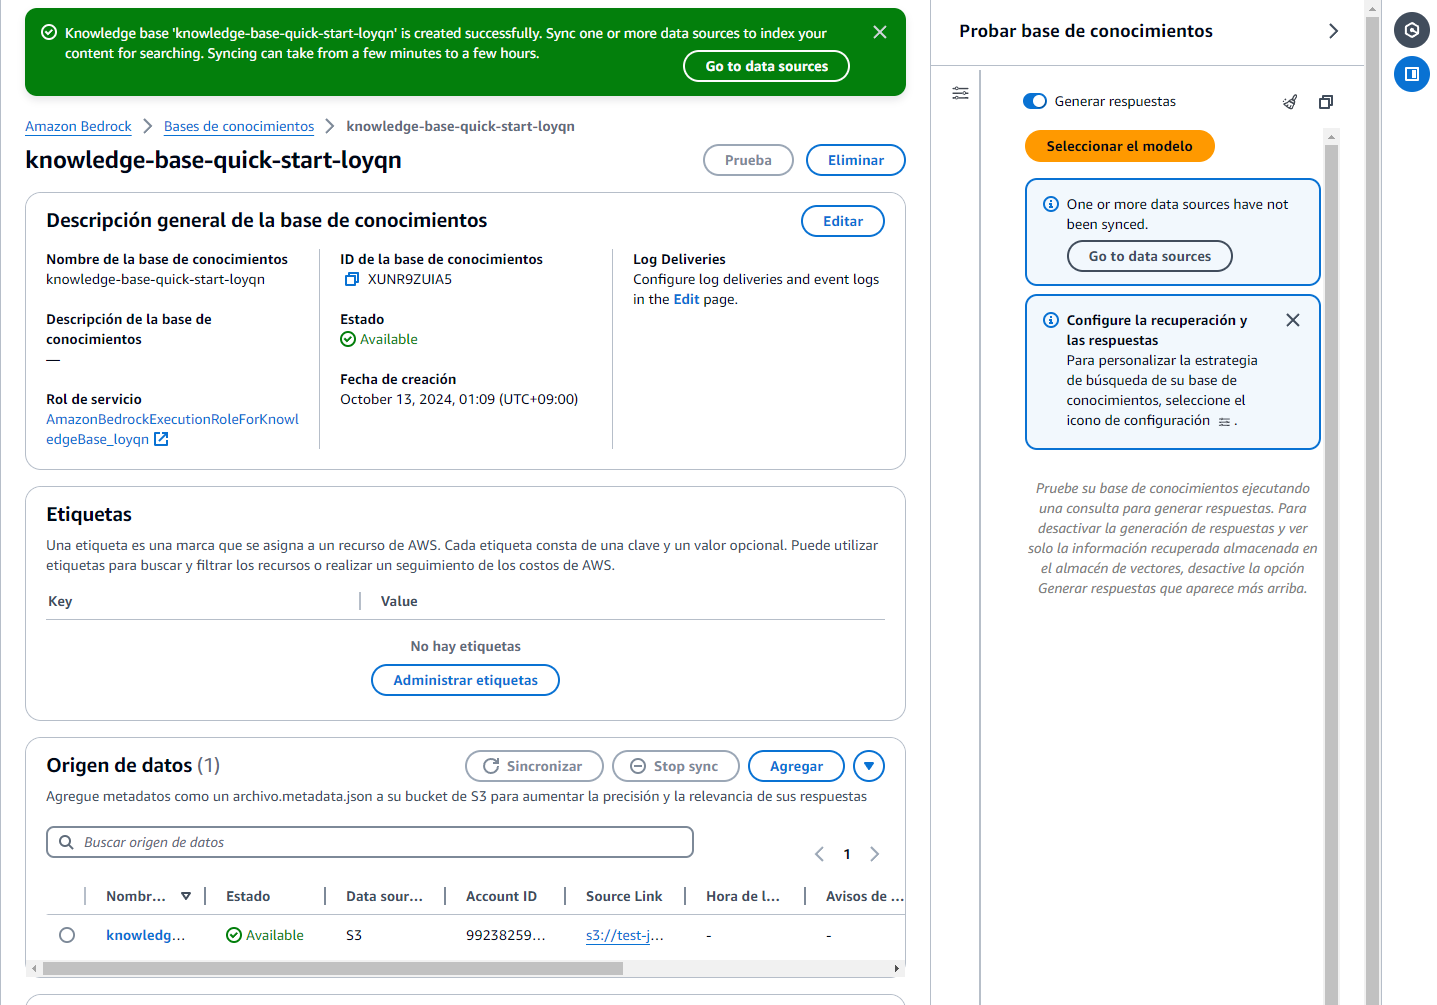

#### **A.8. _Knowledge Base_ synch**  
[ES] Por último, antes de poder utilizar la _Knowledge Base_, debe sincronizarla. El proceso de sincronización examinará cada uno de los documentos en el bucket de S3, los dividirá usando la estrategia de _chunking_ seleccionada y transformará cada una de las partes utilizando el modelo de _embeddings_ elegido.  
**Recuerde que si modifica los documentos en el bucket de S3 (se añaden nuevos, se eliminan existentes o se modifican), será necesario sincronizar de nuevo.**

Para sincronizar, simplemente seleccione el origen de datos y haga clic en "Sincronizar":  

[EN] At last, the _Knowledge Base_ has to be synchronized before using. The synch process will examine each one of the S3 bucket's documents, divide them using the selected _chunking_ strategy and transform each part using the selected _embeddings_ model.

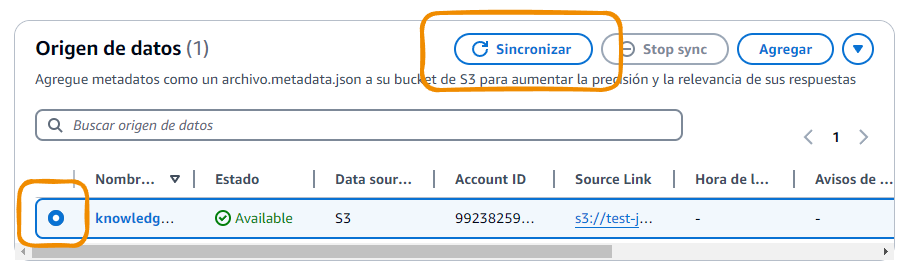

[ES] Verá este mensaje en la parte superior de la pantalla:  

[EN] You will see this message in the top part of the screen.

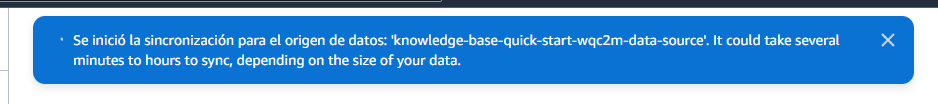

[ES] Y cambiará una vez finalice la sincronización: 

[EN] And it will change once the synch is finished.

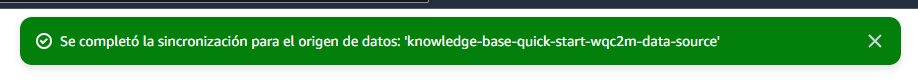

#### **A.9. Copying the Knowledge Base ID**  
[ES] Por último, debe copiar el ID de la _Knowledge Base_ y continuar con la  [Section 2: Using the Amazon Bedrock Knowledge Base](#section-2) de este _notebook_.

[EN] At last, the _Knowledge Base_ ID has to be copied and continue with [Section 2: Using the Amazon Bedrock Knowledge Base](#section-2).

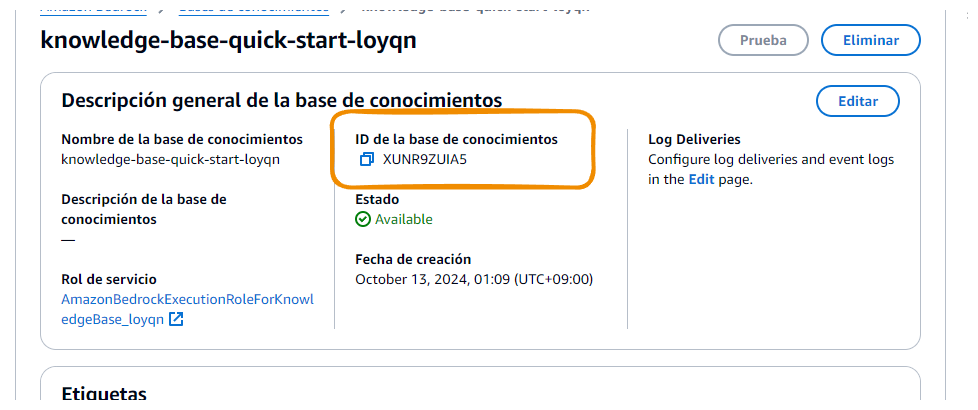

<!-- ### B. Origen de datos: web -->
<h2 id="sectionb">B. Data source: web pages </h2>

### **B.1. "Amazon Bedrock" service access**  
[ES] Desde la página principal de la consola de AWS, puede utilizar el buscador para encontrar el servicio "Amazon Bedrock". Una vez localizado, acceda a servicio.

[EN] Use the search bar in AWS console to find "Amazon Bedrock" service. Once located, access it.

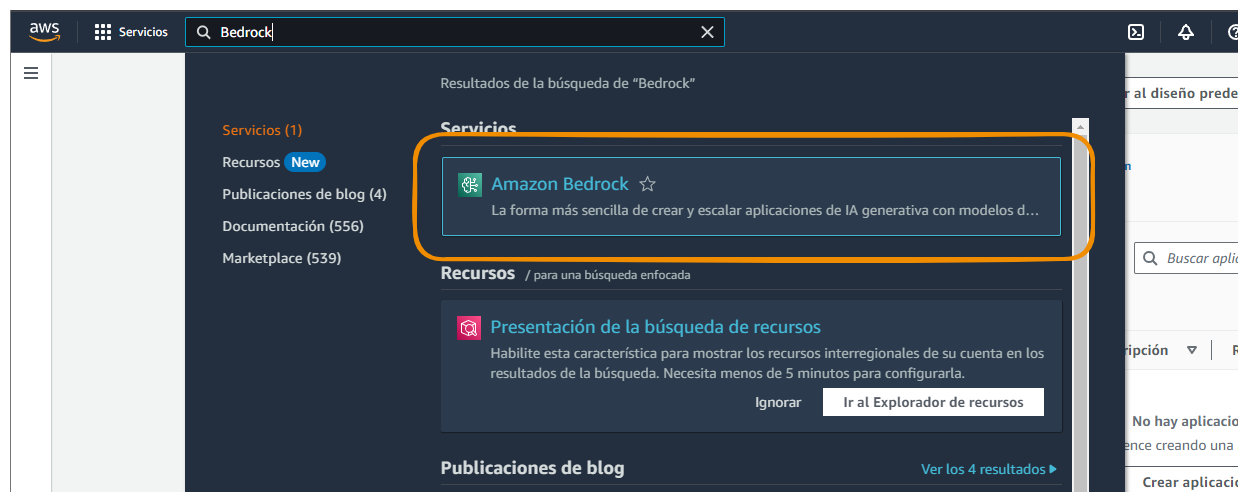

### **B.2. "Knowledge bases" section access**  
[ES] En esta página, puede desplegar el menú de la izquierda usando el botón con tres líneas o hacer clic sobre el botón de "Introducción".  

[EN] Click the tree lines button to open the left side menu or click the "Introduction" button.

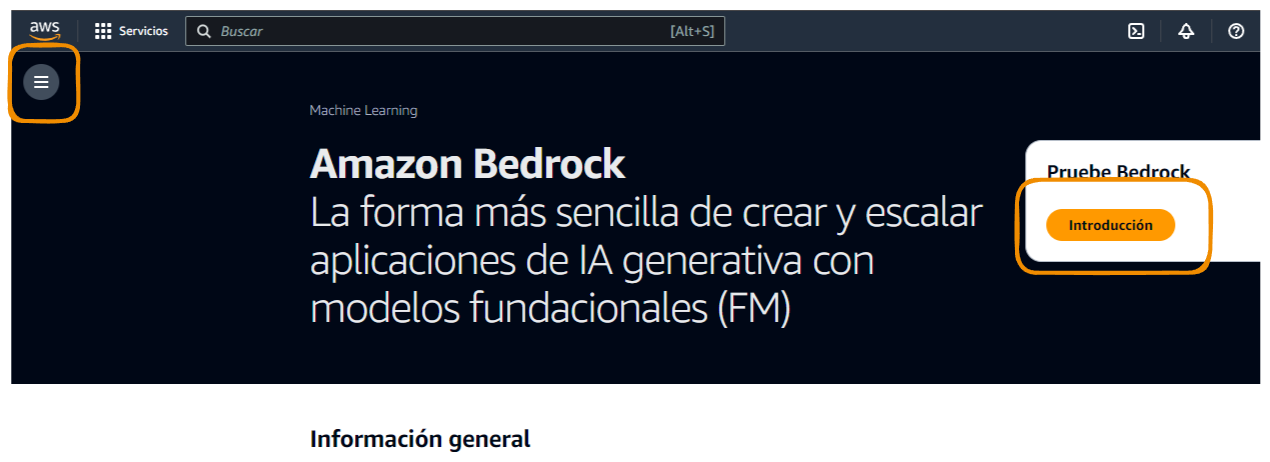  

[ES] El objetivo es encontrar el apartado llamado "Bases de Conocimiento" en el menú de la parte izquierda de la pantalla y acceder a él.     

[EN] The aim is to find the "Knowledge bases" section in the left side menu and access it.

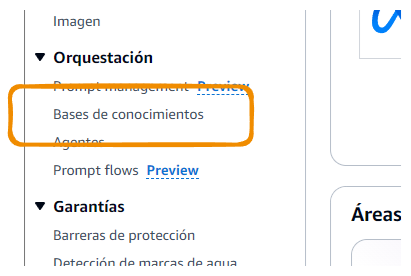

### **B.3. Start a _Knowledge Base_ creation**  
[ES] Para comenzar a crear la _Knowledge Base_, haz clic en el botón "Crear una base de conocimientos".

[EN] Click the "Create a knowledge base" button to start creating the _Knowledge Base_.

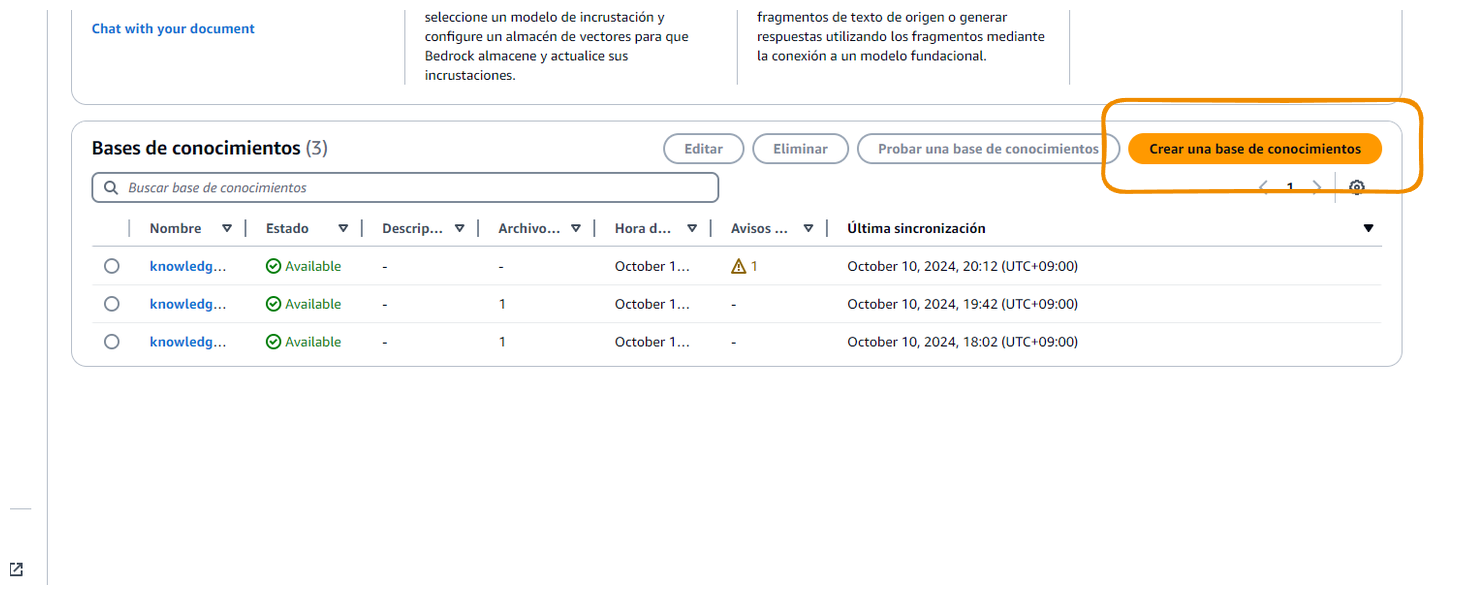  

### **B.4. Knowledge Base creation (1st screen)**  
[ES] En la primera pantalla, podrá asignarle un nombre a la _Knowledge Base_ y, si lo deseas, agregar una descripción.  
El resto de las opciones deben mantenerse por defecto, pero debe asegurarse que la fuente de datos seleccionada sea "Web Crawler": 

[EN] You can assign a name and a description (if needed) to the _Knowledge Base_.
Keep the rest of the option by default, but make sure that the data source is "Web Crawler":

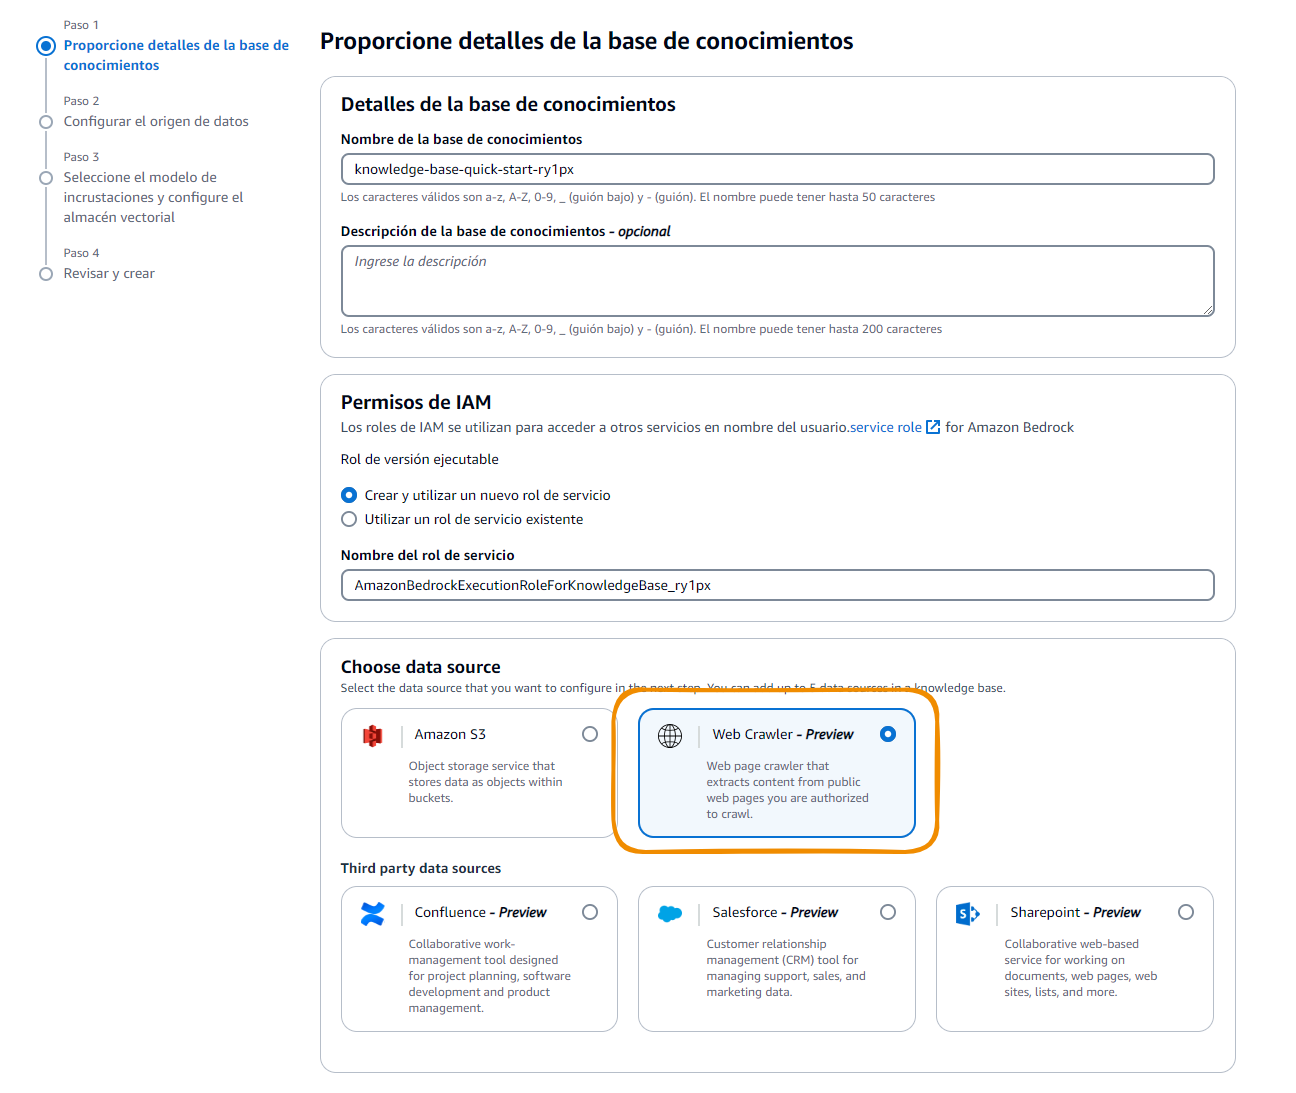

[ES] Continúe al siguiente paso presionando el botón "Siguiente". 

[EN] Click "Next" to continue to the next step.

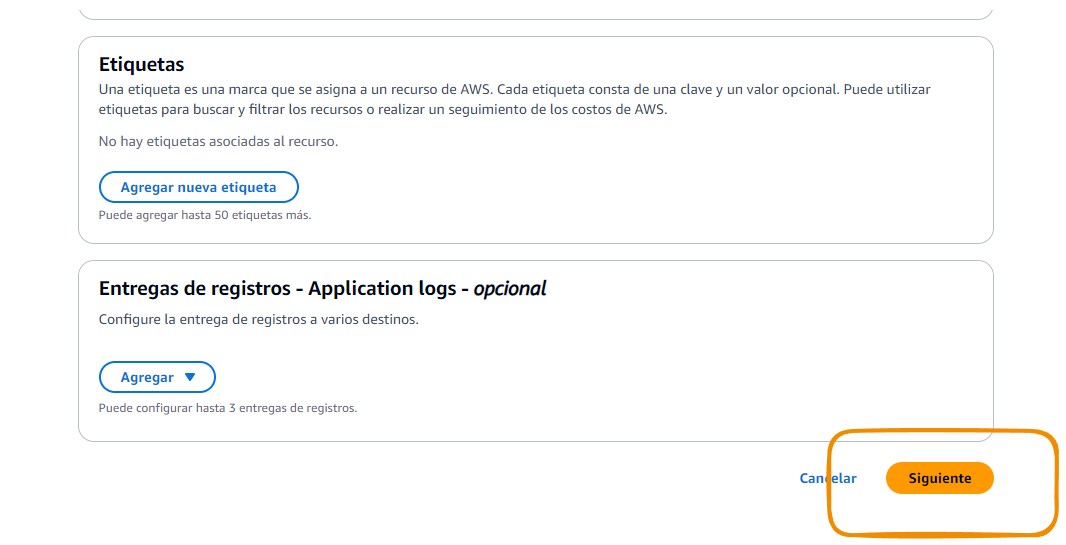

### **B.5. _Knowledge Base_ creation (2nd screen)**  
[ES] En esta pantalla, puede asignar un nombre a la fuente de datos.  

Introduzca la URL, por ejemplo "https://www.clinicbarcelona.org/asistencia/enfermedades", como fuente de datos. En la configuración de "Sync Scope" seleccione la opción más adecuada.

[EN] You can assign a name to the data source in this screen.

Enter the URL, for instance "https://www.clinicbarcelona.org/asistencia/enfermedades", as the data source. Select the most adequate option for "Sync scope" configuration.

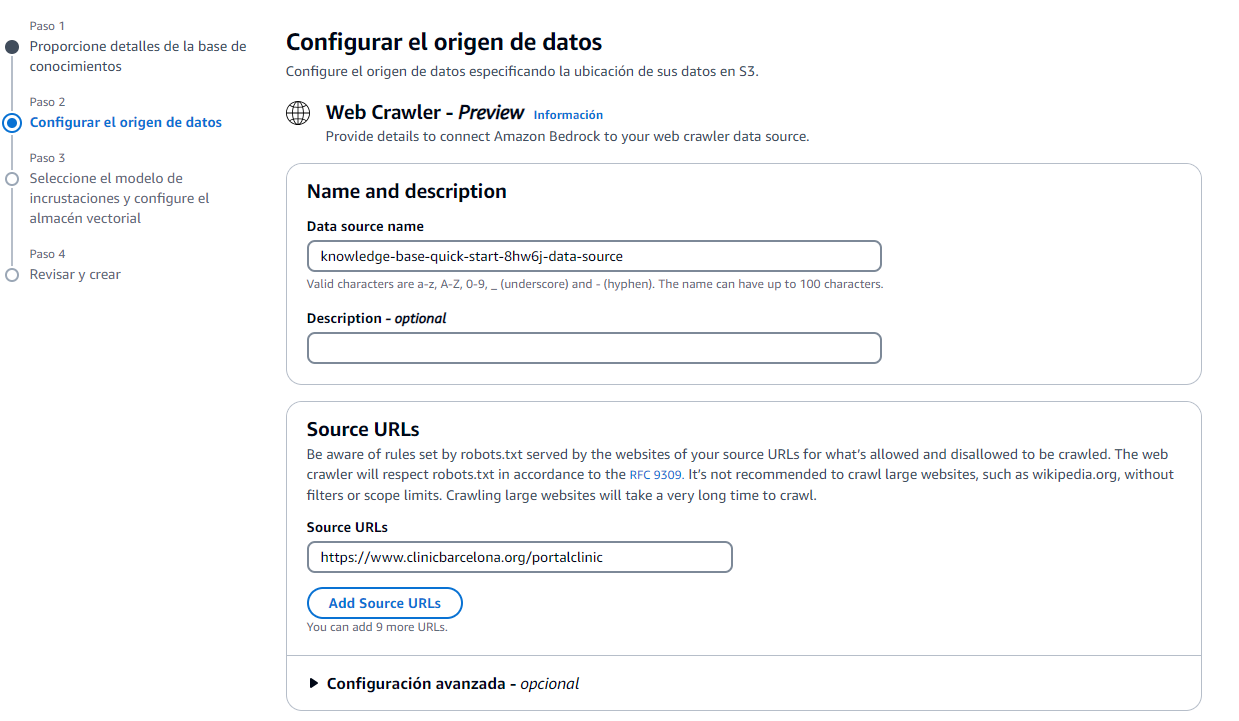
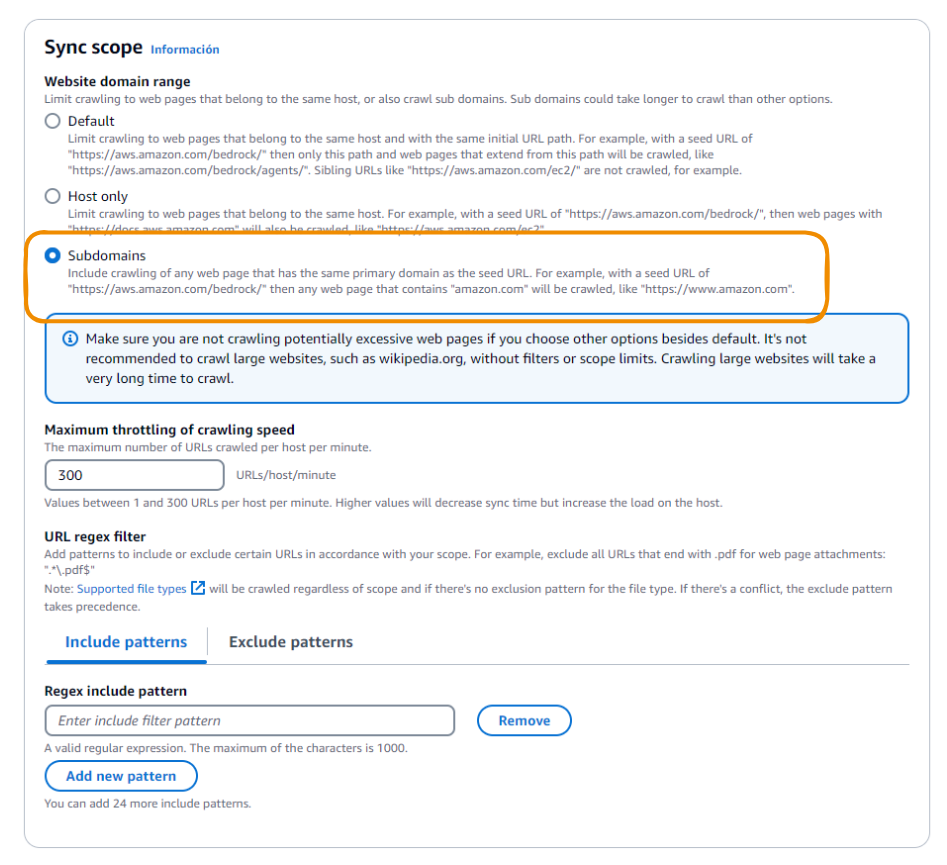

[ES] En cuanto a la estrategia de _chunking_, se deja el valor por defecto*.  
> *Si eres un usuario avanzado o tienes experiencia previa en sistemas de RAG, puede optar por modificar la estrategia de _chunking_ para intentar mejorar los resultados del _retrieval_. Sin embargo, este tutorial no cubre este caso.  

[EN] Keep the default value for the _chunking_ strategy*.
> *If you are an advanced user or have previous experience with RAG, you can modify the _chunking_ strategy to try and improve the _retrieval_ results. Anyway, this is not shown in this tutorial.

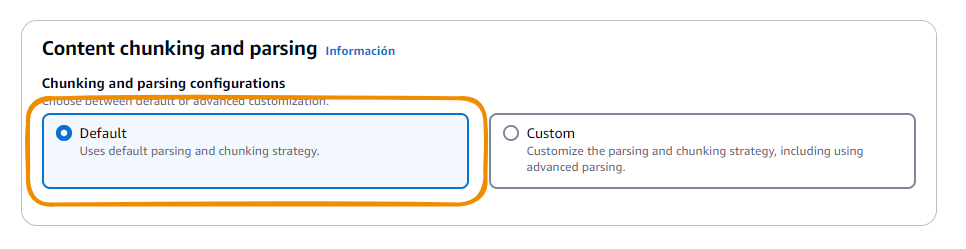

[ES] Finalmente, pulse el botón "Siguiente" para continuar.

[EN] At last, click "Next" to continue.

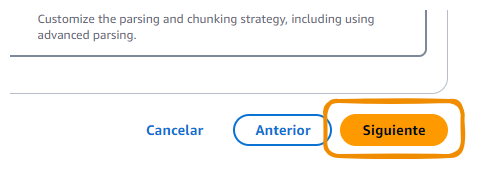

### **B.6. _Knowledge Base_ creation (3rd screen)**  
[ES] En esta pantalla, se elige el modelo de _embeddings_, que es el modelo de inteligencia artificial encargado de transformar el contenido de los documentos en vectores. Estos vectores se compararán con las preguntas de entrada y se utilizarán como contexto para el modelo _LLM_, que será el encargado de responder las preguntas.  

Se recomienda seleccionar el modelo "Embed Multilingual V3" de Cohere, ya que es probable que los documentos con los que trabaje no estén en inglés o se encuentren en varios idiomas. 

Finalmente, pulse el botón "Siguiente" para continuar.  

[EN] The _embeddings_ model is selected in this screen, which stands for the AI model that will transform the documents content to vectors. These vectors will be compared to the input questions and used as context for the _LLM_ model, that will answer the questions.

Cohere's "Embed Multilingual V3" model is advised to use, due to the probability of the used documents to not be in english or to be found in many languages.

At last, click "Next" to continue.

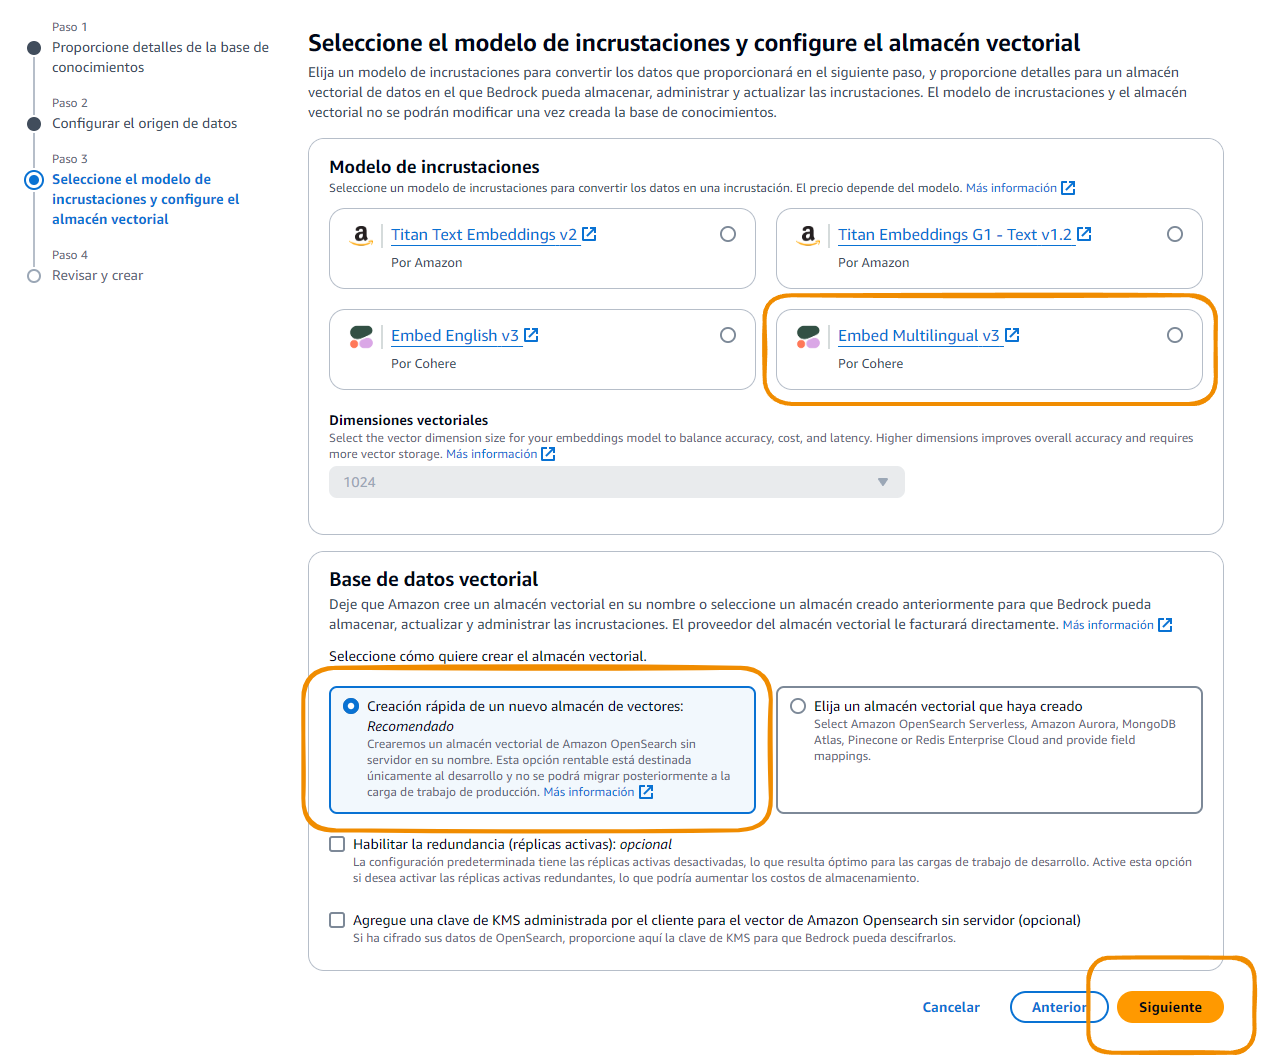

### **B.7. _Knowledge Base_ (Final screen)**  
[ES] En esta pantalla, puede revisar que todas las opciones que ha seleccionado hasta ahora sean correctas.

Si todo está en orden, diríjase a la parte inferior de la pantalla y haga clic en el botón "Crear base de conocimientos".

[EN] This screen is used to review all the selected options and make sure they are correct.

If everything is correct, go to the bottom part of the screen and click "Create a Knowledge Base".

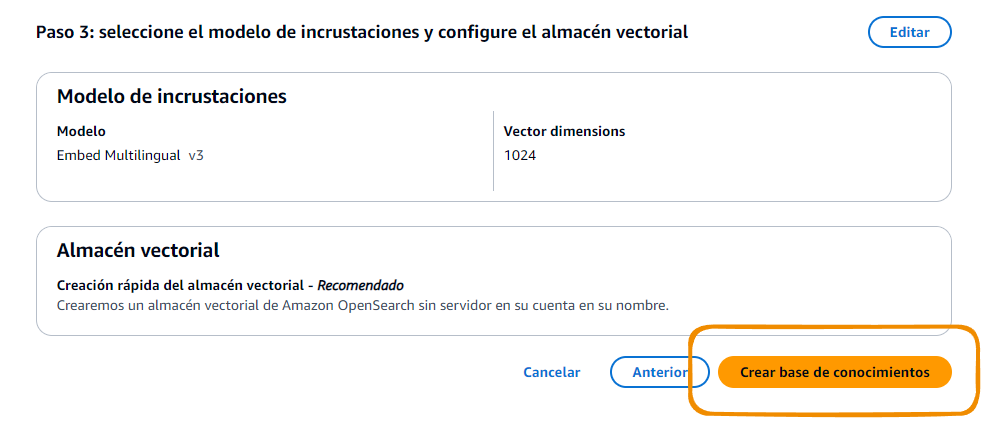

[ES] Mientras se crea la base de conocimientos, debería ver un mensaje como este en la parte superior:

[EN] Meanwhile the base is being created, you should see a message like this in the top part:

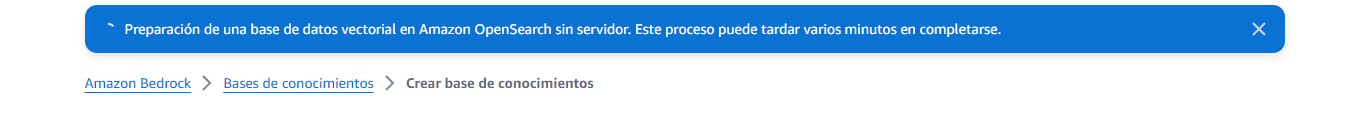

[ES] A medida que avanza la creación, debería ver algo como esto:

[EN] As the creation advances, you should see a message like this:

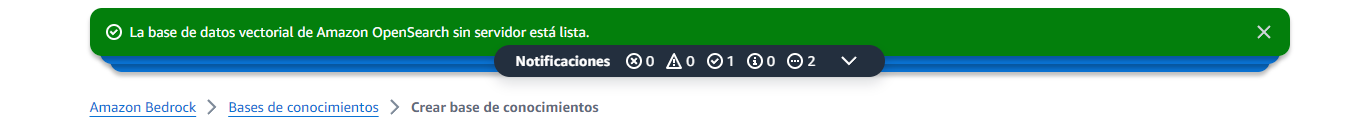

[ES] Finalmente, debería ser redirigido automáticamente a una pantalla como la siguiente:

[EN] At last, you should be redirected to a screen like this:

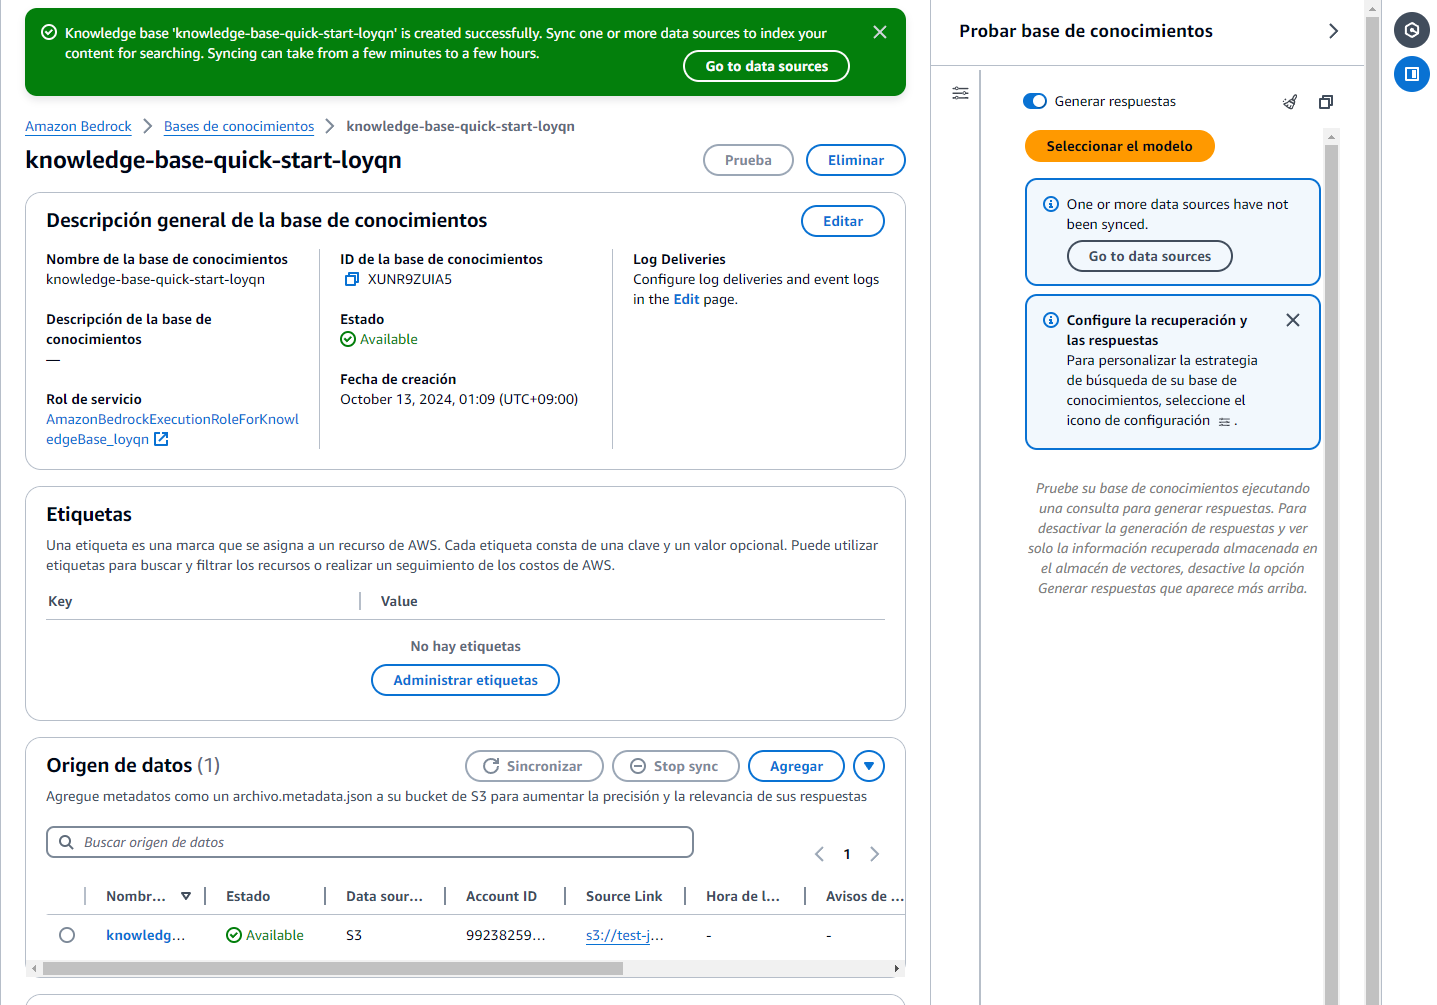



### **B.8. _Knowledge Base_ synch**  
[ES] Por último, antes de poder utilizar la _Knowledge Base_, debe sincronizarla.


Para sincronizar, simplemente seleccione el origen de datos y haga clic en "Sincronizar".  

[EN] At last, the _Knowledge Base_ has to be synchronized before using.


To synch, just select the data source and click "Synch". 


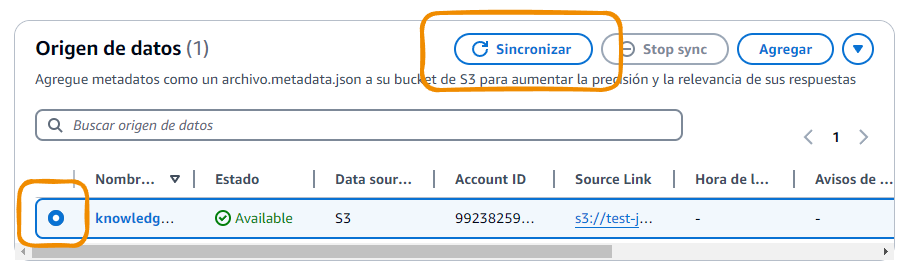

[ES] Verá este mensaje en la parte superior de la pantalla.  

[EN] You will see this message in the top part of the screen.

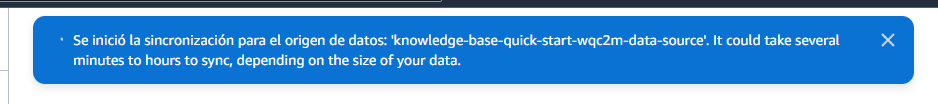

[ES] Y cambiará una vez finalice la sincronización.

[EN] And it will change once the synch is finished.

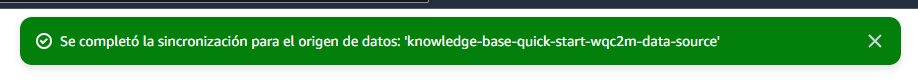

### **B.9. Copying the _Knowledge Base_ ID**  
[ES] Por último, debe copiar el ID de la _Knowledge Base_ y continuar con la [Section 2: Using the Amazon Bedrock Knowledge Base](#section-2) de este _notebook_.

[EN] At last, the _Knowledge Base_ ID has to be copied and continue with [Section 2: Using the Amazon Bedrock Knowledge Base](#section-2).

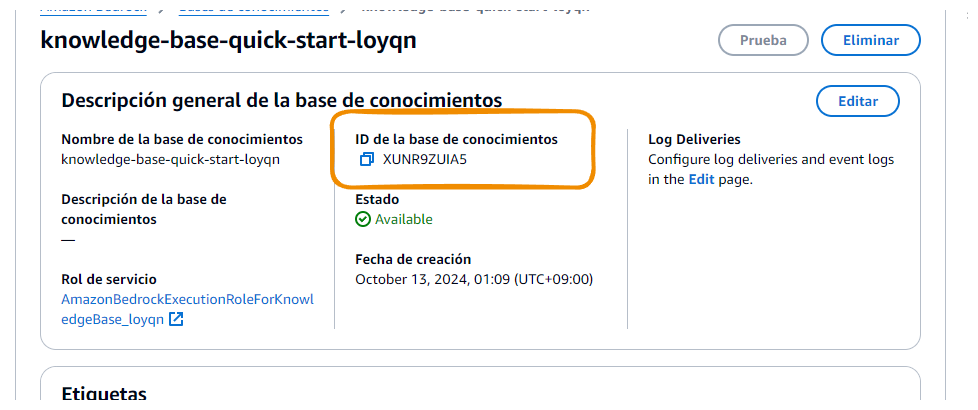

***

<!-- ## Sección 2: Uso de la Knowledge Base de Amazon Bedrock -->
<h1 id="section-2">Section 2: Using the Amazon Bedrock Knowledge Base </h1>

### 1. Package installation
[ES] Estos paquetes deberían estar disponibles en SageMaker por defecto, pero por si acaso, se recomienda ejecutar la siguiente celda:

[EN] These packages are available in SageMaker as default, but it is recommended to run the following cell:

In [ ]:
!pip install botocore
!pip install boto3

### 2. Packet import 
[ES] A continuación, se importa los paquetes que son necesarios en esta demo:
- **boto3**: acceso a las funcionalidades de AWS.
- **display** de IPython: permite imprimir variables de manera más "estética".

[EN] The necessary packets are:
- **boto3**: AWS functionalities access.
- **display** (IPython): allows to print variables in a "prettier" way.

In [72]:
import boto3
from IPython.display import display

### 3. Previous configuration  
[ES] Es **muy importante** cambiar el valor de la variable `knowledge_base_id` al ID de la **base de conocimiento** creada previamente [A.9. Copying the Knowledge Base ID (Sección 1) ](#A.9.-copying-the-knowledge-base-id).
La región debe ser *us-west-2* (Oregón).

[EN] It is **very important** to change the `knowledge_base_id` variable value to the **knowledge base** ID previously created [A.9. Copying the Knowledge Base ID (Sección 1) ](#A.9.-copying-the-knowledge-base-id).
Region must be *us-west-2* (Oregon).

In [ ]:
AWS_REGION_NAME = "us-west-2"
KNOWLEDGE_BASE_ID = "XXXXXXXXX" # Change this !

claude_models = {
    "haiku": f"arn:aws:bedrock:{AWS_REGION_NAME}::foundation-model/anthropic.claude-3-haiku-20240307-v1:0",
    "sonnet": f"arn:aws:bedrock:{AWS_REGION_NAME}::foundation-model/anthropic.claude-3-sonnet-20240229-v1:0",
}

### 4. Amazon Bedrock client creation

In [ ]:
bedrock_agent_runtime_client = boto3.client('bedrock-agent-runtime', region_name=AWS_REGION_NAME)

### 5. Utility function definition  
[ES] La función que se ha creado permite hacer preguntas al modelo LLM y obtener simplemente su salida en texto.

> Si eres un usuario avanzado o tienes experiencia con Python, llamadas a APIs y RAG, puedes experimentar con distintas configuraciones para las fases de _retrieval_, _orchestration_ y _generation_ utilizando esta documentación como referencia: [AWS Bedrock API Reference](https://docs.aws.amazon.com/bedrock/latest/APIReference/API_agent-runtime_KnowledgeBaseRetrieveAndGenerateConfiguration.html)

[EN] The created function allows you to ask the LLM model and get the text output.

> If you are an advanced user, you can experiment with different configurations for the _retrieval_, _orchestration_ and _generation_ phases using the following documentation as a reference: [AWS Bedrock API Reference](https://docs.aws.amazon.com/bedrock/latest/APIReference/API_agent-runtime_KnowledgeBaseRetrieveAndGenerateConfiguration.html)

In [67]:
def generate_response(query: str, model: str) -> str:
    response = bedrock_agent_runtime_client.retrieve_and_generate(
    input={
        "text": query,
    },
    retrieveAndGenerateConfiguration={
        "type": "KNOWLEDGE_BASE",
        "knowledgeBaseConfiguration": {
            "knowledgeBaseId": KNOWLEDGE_BASE_ID,
            "modelArn": model
            # --- Advanced Params
            # (https://docs.aws.amazon.com/bedrock/latest/APIReference/API_agent-runtime_KnowledgeBaseRetrieveAndGenerateConfiguration.html)
            # "generationConfiguration": {...},
            # "retrievalConfiguration": {...},
            # "orchestrationConfiguration: {...}
            # ---
            
        }
    })
        
    return response["output"]["text"]

## EXAMPLE: Interact with the model
[ES] Ahora ya dispone de todo lo necesario para hacer preguntas al modelo e imprimir el resultado.

[EN] Now, you can interact with the model and print the provided result.

In [ ]:
response = generate_response(query = "Què és el nucli 2025?", model = claude_models["sonnet"])
display(response)